An example of visulizing how well LSST can detect NEO objects and plottting things in rotating ecliptic coordinates.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
from lsst.sims.maf.plots import NeoDistancePlotter
import lsst.sims.maf.plots as plotters

In [2]:
# Set up the database connection
dbDir = '../../tutorials/'
opsdb = db.OpsimDatabase(os.path.join(dbDir,'enigma_1189_sqlite.db'))
outDir = 'NeoDistance_enigma'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
slicer = slicers.UniSlicer()
metric = metrics.PassMetric(metricName='NEODistances')
stacker = stackers.NEODistStacker()
stacker2 = stackers.EclipticStacker()
filters = ['u','g','r','i','z','y']

Plotting the maximum distance an H=22 NEO could be detected in each LSST pointing (year 1). Sun is at the origin (0,0), Earth is at (0,1). Plotting everything in the earth-sun-neo plane (i.e., for the true 3-d distrubution, points would be rotated around the y-axis).

Note, this is a non-intuitive projection of the data. It is essentially plotting points in polar coordinates of solar elongation angle and NEO distance.  Thus, the planet orbits are illustrative, but only realistic if one restricts the observations to be in the ecliptic plane.

Querying database with constraint night < 365 and filter="u"
Found 23810 visits
Running:  ['u']
Completed metric generation.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'night < 365 and filter="u...' should be explicitly declared as text('night < 365 and filter="u...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Warning! Cannot save non-conforming summary statistic.



Running reduce methods.
Running summary statistics.
Completed.
Plotting.
Plotting complete.
Querying database with constraint night < 365 and filter="g"
Found 31020 visits
Running:  ['g']
Completed metric generation.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'night < 365 and filter="g...' should be explicitly declared as text('night < 365 and filter="g...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Warning! Cannot save non-conforming summary statistic.



Running reduce methods.
Running summary statistics.
Completed.
Plotting.
Plotting complete.
Querying database with constraint night < 365 and filter="r"
Found 37613 visits
Running:  ['r']
Completed metric generation.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'night < 365 and filter="r...' should be explicitly declared as text('night < 365 and filter="r...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Warning! Cannot save non-conforming summary statistic.



Running reduce methods.
Running summary statistics.
Completed.
Plotting.
Plotting complete.
Querying database with constraint night < 365 and filter="i"
Found 47309 visits
Running:  ['i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
Plotting complete.
Querying database with constraint night < 365 and filter="z"
Found 73150 visits
Running:  ['z']
Completed metric generation.

Warning! Cannot save non-conforming summary statistic.
Warning! Cannot save non-conforming summary statistic.



Running reduce methods.
Running summary statistics.
Completed.
Plotting.
Plotting complete.
Querying database with constraint night < 365 and filter="y"
Found 59044 visits
Running:  ['y']
Completed metric generation.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'night < 365 and filter="y...' should be explicitly declared as text('night < 365 and filter="y...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Warning! Cannot save non-conforming summary statistic.



Running reduce methods.
Running summary statistics.
Completed.
Plotting.
Plotting complete.


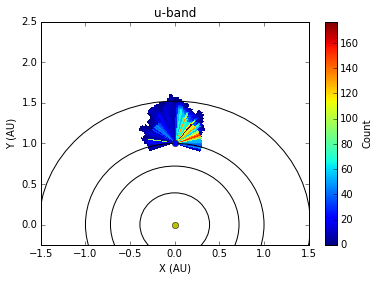

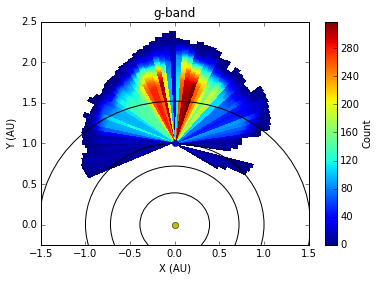

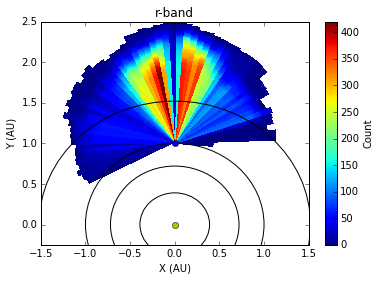

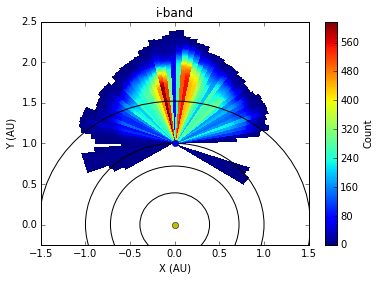

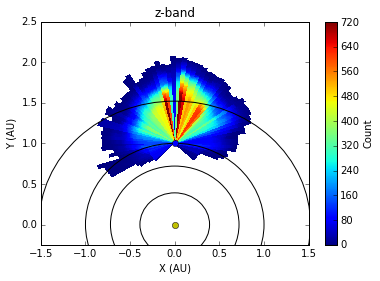

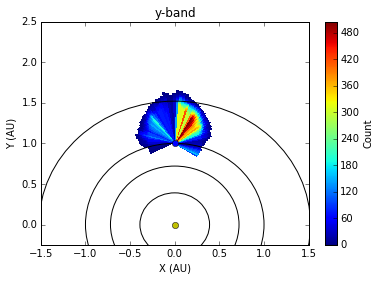

In [4]:
for filterName in filters:
    bundle = metricBundles.MetricBundle(metric, slicer,
                                        'night < 365 and filter="%s"'%filterName,
                                        stackerList=[stacker,stacker2],
                                        plotDict={'title':'%s-band'%filterName},
                                        plotFuncs=[NeoDistancePlotter()])
    bgroup = metricBundles.MetricBundleGroup({filterName:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

A perhaps slightly more intuitive way to plot the data is in rotating ecliptic coordinates.  Here, opposition is at the center of the plot and the ecliptic is the center horizontal line.

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint 
Found 2469307 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 439.414  dipole: lon: -165.05, lat: -40.9907, amp: 1433.74
Plotting complete.


/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression '' should be explicitly declared as text('') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


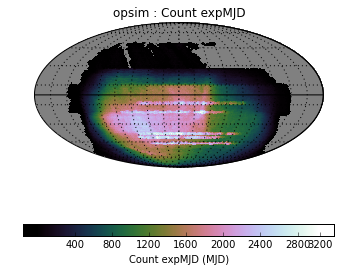

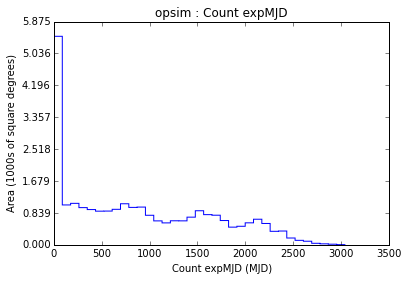

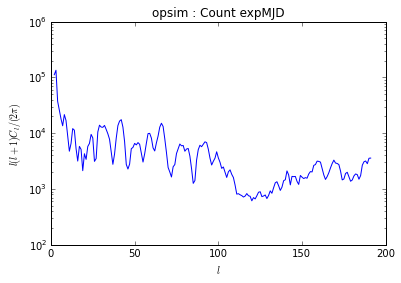

In [5]:
metric = metrics.CountMetric('expMJD')
slicer = slicers.HealpixSlicer(nside=64, latCol='eclipLat',lonCol='eclipLon')
stacker = stackers.EclipticStacker(subtractSunLon=True)
sql = ''
plotDict = {'rot':(180,0,0)}
bundle = metricBundles.MetricBundle(metric, slicer,sql,stackerList=[stacker], plotDict=plotDict)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint filter ="u"
Found 186607 visits
Running:  ['u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 0.30377  dipole: lon: 176.684, lat: -1.10165, amp: 0.0876689
Plotting complete.
Querying database with constraint filter ="g"
Found 249108 visits
Running:  ['g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 0.854239  dipole: lon: 179.81, lat: -17.203, amp: 0.126667
Plotting complete.
Querying database with constraint filter ="r"
Found 544710 visits
Running:  ['r']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 1.02505  dipole: lon: -173.922, lat: -33.0121, amp: 0.0870906
Plotting complete.
Querying database with constraint filter ="i"
Found 545488 visits
Running:  ['i']
Completed metric gener

Optimal bin calculation tried to make 244 bins, returning 200


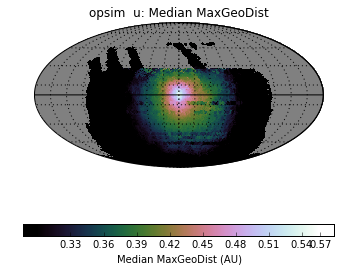

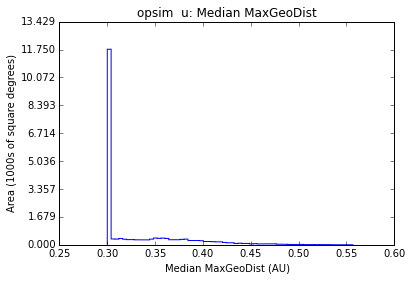

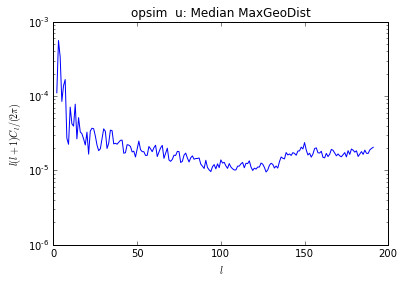

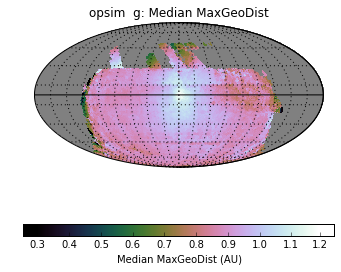

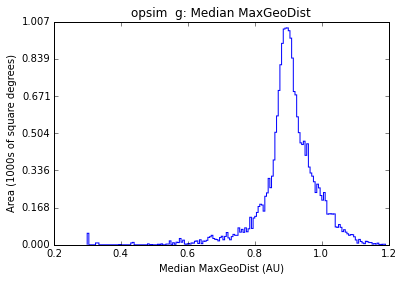

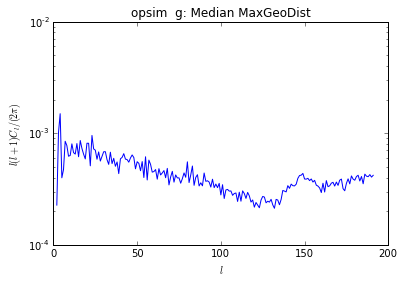

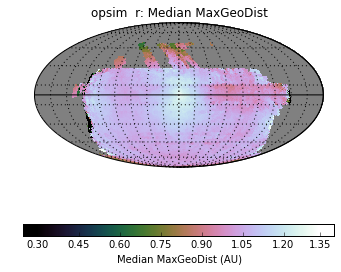

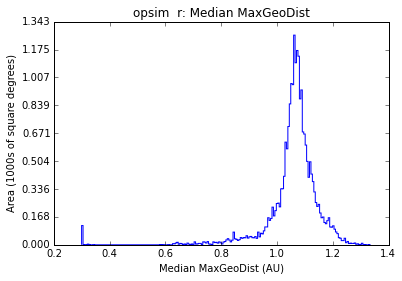

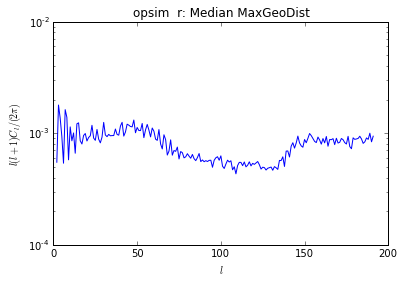

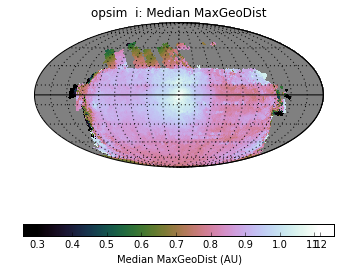

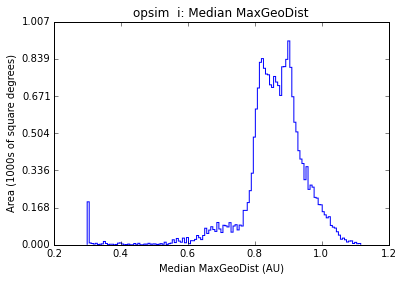

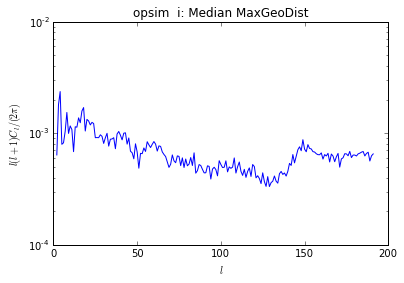

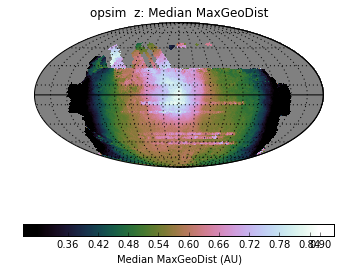

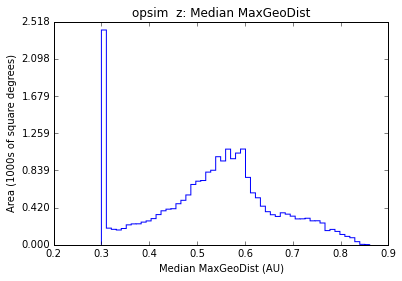

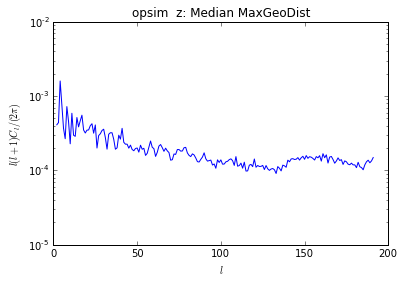

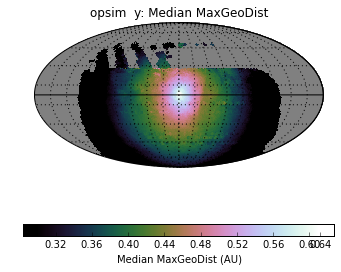

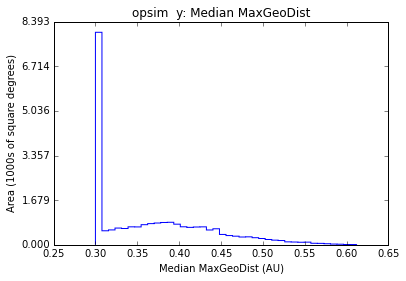

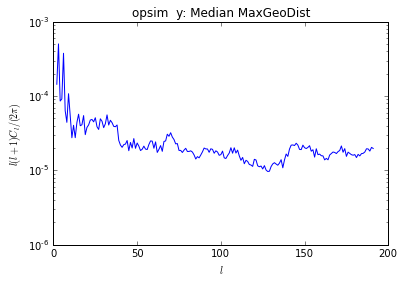

In [6]:
# Loop through each filter and see the median and max neo dist
metric = metrics.MedianMetric('MaxGeoDist')
slicer = slicers.HealpixSlicer(nside=64, latCol='eclipLat',lonCol='eclipLon')
stacker = stackers.EclipticStacker(subtractSunLon=True)
stacker2 = stackers.NEODistStacker()
plotDict = {'rot':(180,0,0)}
for i,filterName in enumerate(filters):
    sql = 'filter ="%s"'%filterName
    bundle = metricBundles.MetricBundle(metric, slicer,sql,stackerList=[stacker,stacker2], plotDict=plotDict)
    bgroup = metricBundles.MetricBundleGroup({filterName:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint 
Found 2469307 visits
Running:  [0, 1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 0.524925  dipole: lon: -171.238, lat: -16.1665, amp: 0.400096
monopole: 1.09086  dipole: lon: 177.555, lat: -43.9908, amp: 0.384297
Plotting complete.


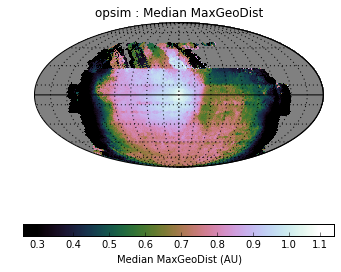

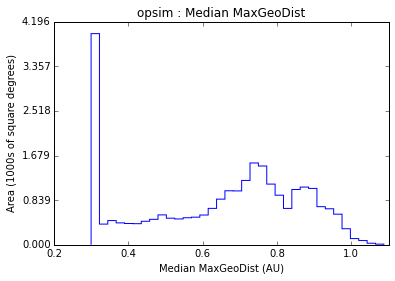

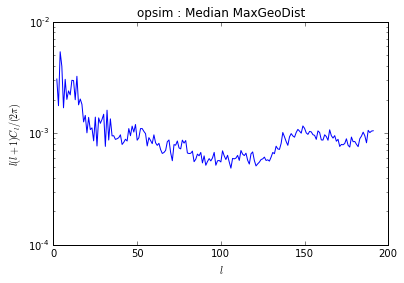

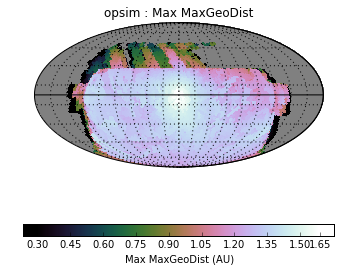

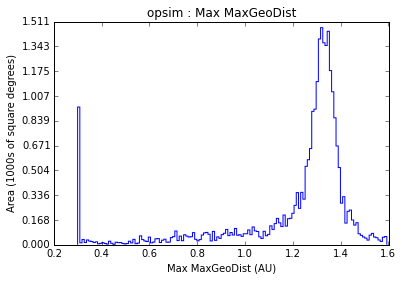

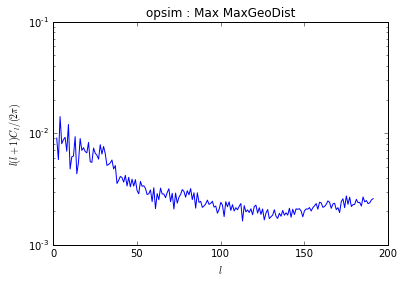

In [7]:
# All observations
metric = metrics.MedianMetric('MaxGeoDist')
metric2 = metrics.MaxMetric('MaxGeoDist')
slicer = slicers.HealpixSlicer(nside=64, latCol='eclipLat',lonCol='eclipLon')
stacker = stackers.EclipticStacker(subtractSunLon=True)
stacker2 = stackers.NEODistStacker()
plotDict = {'rot':(180,0,0)}
bDict = {}
sql = ''
bundle = metricBundles.MetricBundle(metric, slicer,sql,stackerList=[stacker,stacker2], plotDict=plotDict)
bDict[0]=bundle
bundle2 = metricBundles.MetricBundle(metric2, slicer,sql,stackerList=[stacker,stacker2], plotDict=plotDict)
bDict[1] = bundle2
bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint 
Found 2469307 visits
Running:  [0, 1, 2]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting.
monopole: 170.104  dipole: lon: -92.7113, lat: 71.0541, amp: 49.5418
monopole: 138.665  dipole: lon: -63.4536, lat: 75.4537, amp: 36.9471
monopole: 58.8386  dipole: lon: -43.5418, lat: -80.0863, amp: 7.53242
Plotting complete.


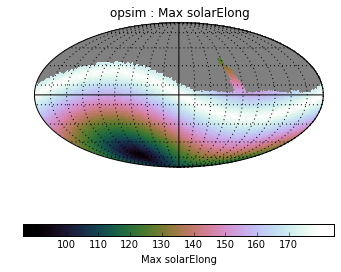

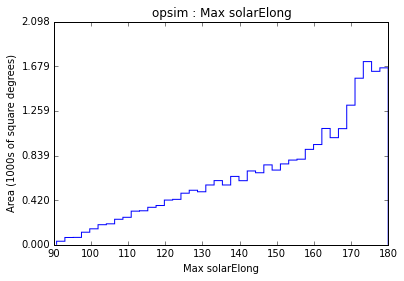

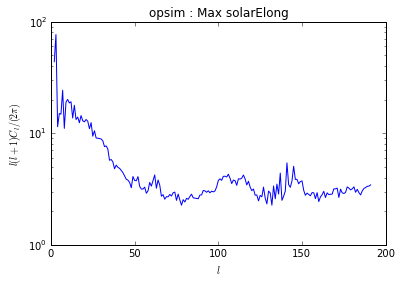

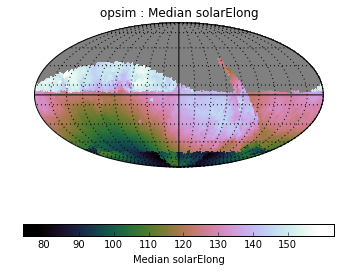

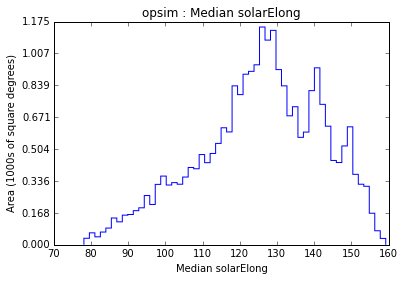

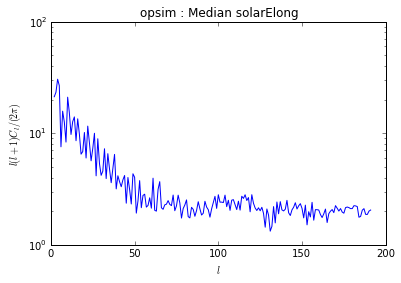

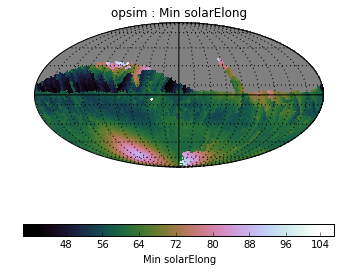

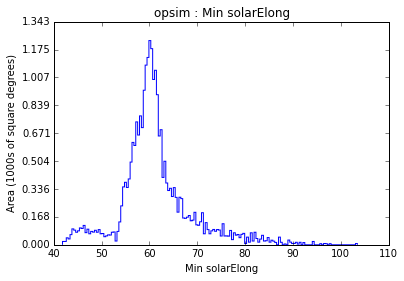

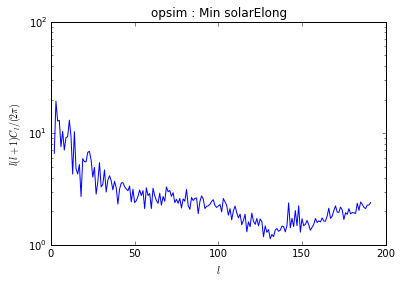

In [8]:
metric = metrics.MaxMetric('solarElong')
metric2 = metrics.MinMetric('solarElong')
slicer = slicers.HealpixSlicer(nside=64)
sql = ''
bundle = metricBundles.MetricBundle(metric, slicer,sql)
bDict = {0:bundle}
bundle = metricBundles.MetricBundle(metric2, slicer,sql)
bDict[2] = bundle
metric = metrics.MedianMetric('solarElong')
bundle = metricBundles.MetricBundle(metric, slicer,sql)
bDict[1]= bundle
bgroup = metricBundles.MetricBundleGroup(bDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)